In [69]:
import pandas as pd

from datetime import date

In [133]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [134]:
dh_vol_tweets = pd.read_json('../../data/decahose-vol-tweets.json/part-00000-accff8bd-8a8f-4cec-8a58-90aca925b3bc-c000.json', lines=True)

In [135]:
dh_vol_links = pd.read_json('../../data/decahose-vol-links.json/part-00000-5cafe3fa-4640-4a9c-9738-3ebd57e2aa61-c000.json', lines=True)

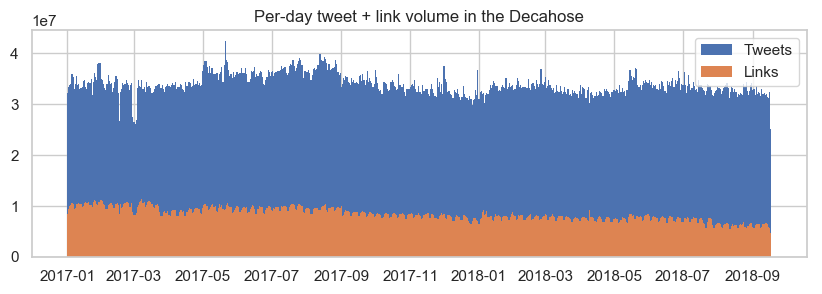

In [143]:
tweet_pdf = dh_vol_tweets[dh_vol_tweets.year >= 2017].copy()
tweet_pdf['date'] = tweet_pdf.apply(lambda r: date(int(r.year), int(r.month), int(r.day)), 1)
tweet_pdf = tweet_pdf.sort_values('date')

link_pdf = dh_vol_links[dh_vol_links.year >= 2017].copy()
link_pdf['date'] = link_pdf.apply(lambda r: date(int(r.year), int(r.month), int(r.day)), 1)
link_pdf = link_pdf.sort_values('date')

plt.figure(figsize=(10,3), dpi=100)

plt.title('Per-day tweet + link volume in the Decahose')

plt.bar(tweet_pdf.date.unique(), tweet_pdf['count'], linewidth=0, width=1, label='Tweets')
plt.bar(link_pdf.date.unique(), link_pdf['count'], linewidth=0, width=1, label='Links')
plt.legend()

plt.savefig('figures/decahose-tweet-link-vol.png')

In [146]:
dh_vol_tweets['count'].sum()

22095201428

In [147]:
dh_vol_links['count'].sum()

5568773434

In [148]:
dh_vol_links['count'].sum() / dh_vol_tweets['count'].sum()

0.25203542281099134

In [18]:
link_ts_counts = pd.read_json('../../data/domain-link-ts-counts.json/part-00000-9e1063a9-9847-4a0e-96fd-74c637882e67-c000.json', lines=True)

In [51]:
article_ts_counts = pd.read_json('../../data/domain-article-ts-counts.json/part-00000-edd2a29f-0be2-4ebc-bb4f-6e95f5afdc43-c000.json', lines=True)

In [71]:
imp_ts_counts = pd.read_json('../../data/domain-imp-ts-counts.json/part-00000-fb29a2f7-5c24-4ab2-bc6e-3fe1b019a902-c000.json', lines=True)
imp_ts_counts = imp_ts_counts.rename(columns={'imp': 'count'})

In [137]:
def plot_domain_ts(df, domain, w=10, h=3, dpi=100, title=None, dst=None):
    
    pdf = df[(df.domain==domain)&(df.year >= 2017)].copy()
    pdf['date'] = pdf.apply(lambda r: date(r.year, r.month, r.day), 1)
    pdf = pdf.sort_values('date')
    
    plt.figure(figsize=(10,3), dpi=dpi)
    
    if title:
        plt.title(title)

    plt.bar(pdf.date.unique(), pdf['count'], linewidth=0, width=1)
    
    if dst:
        plt.savefig(dst)

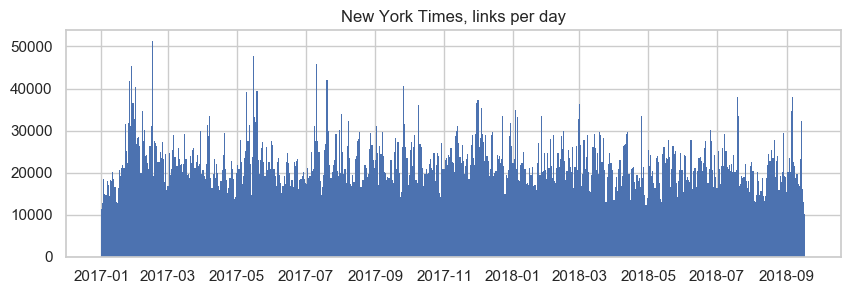

In [138]:
plot_domain_ts(link_ts_counts, 'nytimes.com', title='New York Times, links per day', dst='figures/nyt-links-per-day.png')

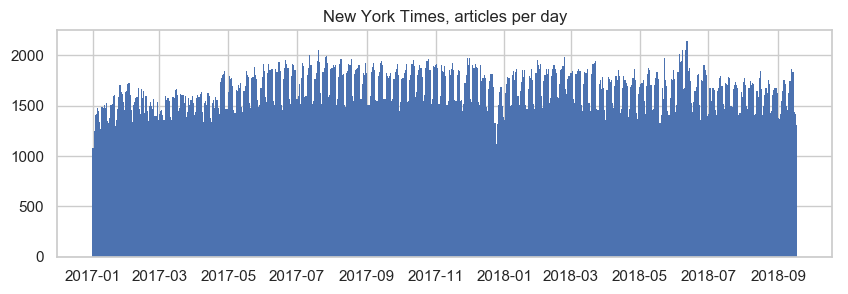

In [109]:
plot_domain_ts(article_ts_counts, 'nytimes.com', title='New York Times, articles per day', dst='figures/nyt-articles-per-day.png')

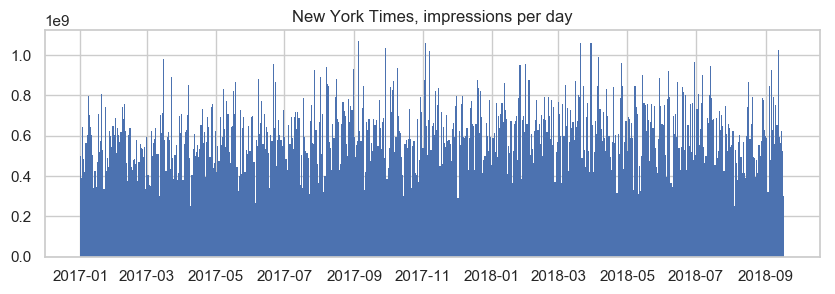

In [110]:
plot_domain_ts(imp_ts_counts, 'nytimes.com', title='New York Times, impressions per day', dst='figures/nyt-imp-per-day.png')